In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd

# Ajusta la ruta según donde esté tu archivo
ruta = '/content/drive/MyDrive/datos_tratados.csv'
df = pd.read_csv(ruta)
df.head()

,customer.tenure,account.Charges.Monthly,account.Charges.Total,account.Contract,account.PaymentMethod,internet.InternetService,internet.OnlineSecurity,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Churn
0,9,65.6,593.3,One year,Mailed check,DSL,No,Yes,Yes,No,No
1,9,59.9,542.4,Month-to-month,Mailed check,DSL,No,No,No,Yes,No
2,4,73.9,280.85,Month-to-month,Electronic check,Fiber optic,No,No,No,No,Yes
3,13,98.0,1237.85,Month-to-month,Electronic check,Fiber optic,No,No,Yes,Yes,Yes
4,3,83.9,267.4,Month-to-month,Mailed check,Fiber optic,No,Yes,Yes,No,Yes


In [79]:
# Verifica las columnas disponibles
df.columns

Index(['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total',
       'account.Contract', 'account.PaymentMethod', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'Churn'],
      dtype='object')

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Lista de columnas categóricas
categorical_cols = ['account.Contract', 'account.PaymentMethod', 'internet.InternetService',
                    'internet.OnlineSecurity', 'internet.TechSupport',
                    'internet.StreamingTV', 'internet.StreamingMovies']

# Codificador
encoder = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

df_encoded = encoder.fit_transform(df)

In [81]:
# Conteo absoluto
conteo = df['Churn'].value_counts()

# Proporción relativa
proporcion = df['Churn'].value_counts(normalize=True)

print("Conteo de clases:")
print(conteo)
print("\nProporción de clases:")
print(proporcion)

Conteo de clases:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción de clases:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [82]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [83]:
numeric_df = df.select_dtypes(include=['number'])

In [84]:
correlation_matrix = numeric_df.corr()

/tmp/ipython-input-2837318466.py:7: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


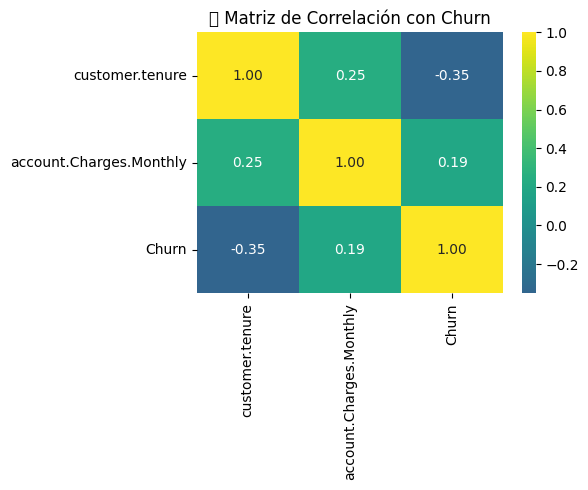

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", center=0)
plt.title('🔍 Matriz de Correlación con Churn')
plt.tight_layout()
plt.show()

##Boxplot: Tiempo de contrato × Cancelación


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


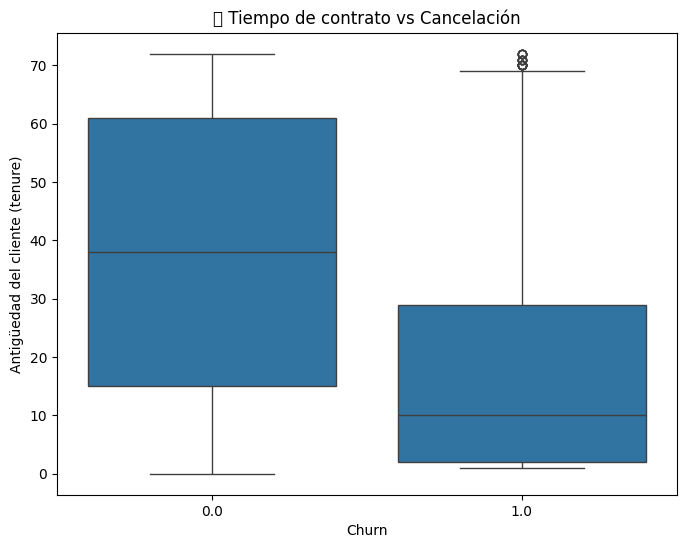

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Churn')
plt.ylabel('Antigüedad del cliente (tenure)')
plt.show()

##Boxplot: Gasto total × Cancelación


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


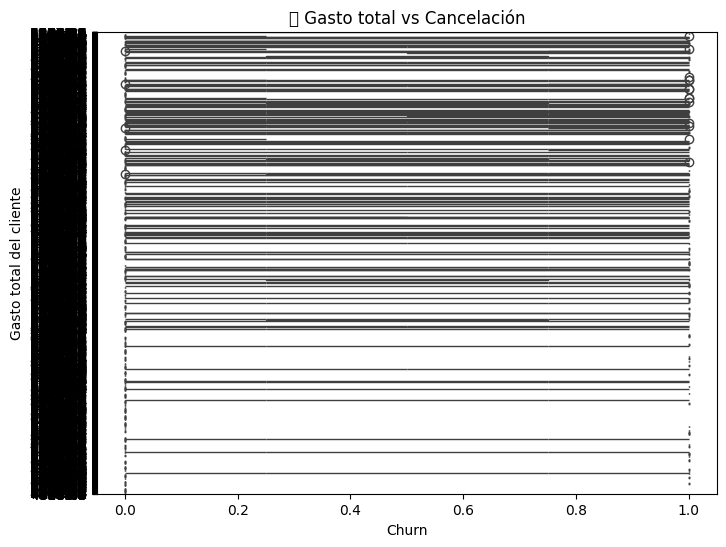

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Gasto total vs Cancelación')
plt.xlabel('Churn')
plt.ylabel('Gasto total del cliente')
plt.show()

##Scatter plot: Tiempo de contrato vs Gasto total (coloreado por Churn)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


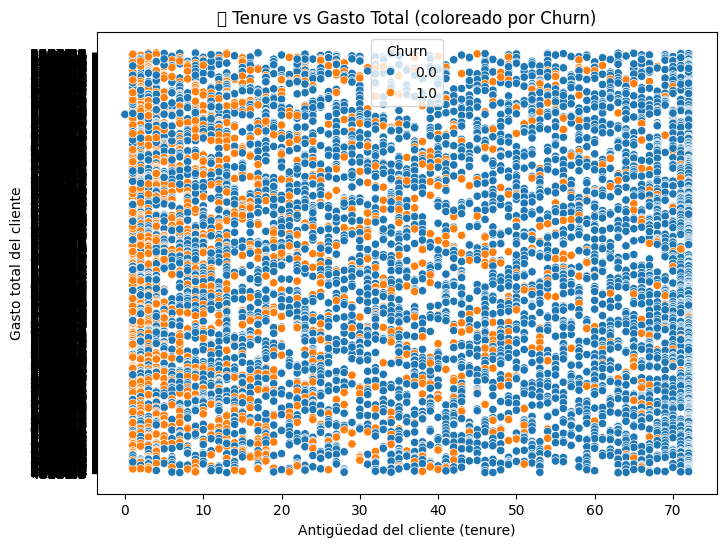

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df)
plt.title('🔄 Tenure vs Gasto Total (coloreado por Churn)')
plt.xlabel('Antigüedad del cliente (tenure)')
plt.ylabel('Gasto total del cliente')
plt.legend(title='Churn')
plt.show()

In [88]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [89]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [91]:
df_clean = df_encoded.dropna(subset=['Churn'])
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

##RegresionLogistica

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Pipeline con normalización
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenamiento
logistic_pipeline.fit(X_train, y_train)

# Evaluación
y_pred_log = logistic_pipeline.predict(X_test)
print("🔍 Regresión Logística")
print(classification_report(y_test, y_pred_log))

🔍 Regresión Logística
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1552
         1.0       0.63      0.40      0.49       561

    accuracy                           0.78      2113
   macro avg       0.72      0.66      0.67      2113
weighted avg       0.76      0.78      0.76      2113



##Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluación
y_pred_rf = rf_model.predict(X_test)
print("🌲 Random Forest")
print(classification_report(y_test, y_pred_rf))

🌲 Random Forest
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1552
         1.0       0.63      0.47      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



##Evaluacion de Modelos

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones
y_pred_log = logistic_pipeline.predict(X_test)

# Métricas
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
conf_log = confusion_matrix(y_test, y_pred_log)

print("🔍 Regresión Logística")
print(f"Accuracy: {acc_log:.2f}")
print(f"Precision: {prec_log:.2f}")
print(f"Recall: {rec_log:.2f}")
print(f"F1-score: {f1_log:.2f}")
print("Matriz de Confusión:\n", conf_log)

🔍 Regresión Logística
Accuracy: 0.78
Precision: 0.63
Recall: 0.40
F1-score: 0.49
Matriz de Confusión:
 [[1420  132]
 [ 339  222]]


In [96]:
# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_rf = confusion_matrix(y_test, y_pred_rf)

print("🌲 Random Forest")
print(f"Accuracy: {acc_rf:.2f}")
print(f"Precision: {prec_rf:.2f}")
print(f"Recall: {rec_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")
print("Matriz de Confusión:\n", conf_rf)

🌲 Random Forest
Accuracy: 0.79
Precision: 0.63
Recall: 0.47
F1-score: 0.53
Matriz de Confusión:
 [[1398  154]
 [ 300  261]]


##Regresión Logística – Coeficientes


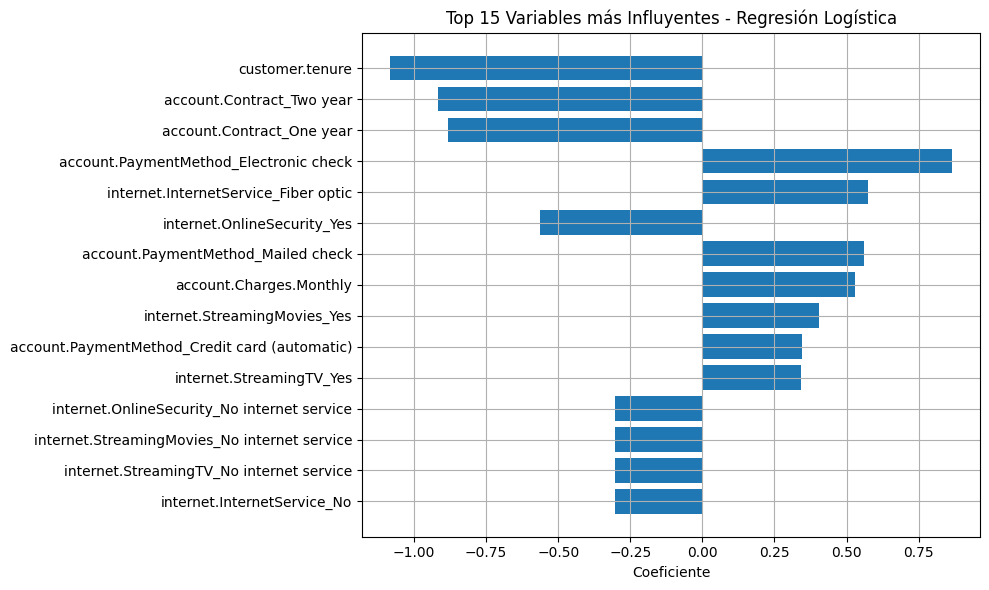

In [100]:
# Extraer coeficientes
logreg_model = logistic_pipeline.named_steps['logreg']
coefficients = logreg_model.coef_[0]

# DataFrame ordenado
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Top 15
top_log = coef_df.head(15)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(top_log['Feature'][::-1], top_log['Coefficient'][::-1])
plt.title('Top 15 Variables más Influyentes - Regresión Logística')
plt.xlabel('Coeficiente')
plt.grid(True)
plt.tight_layout()
plt.show()

##Random Forest – Importancia de Variables


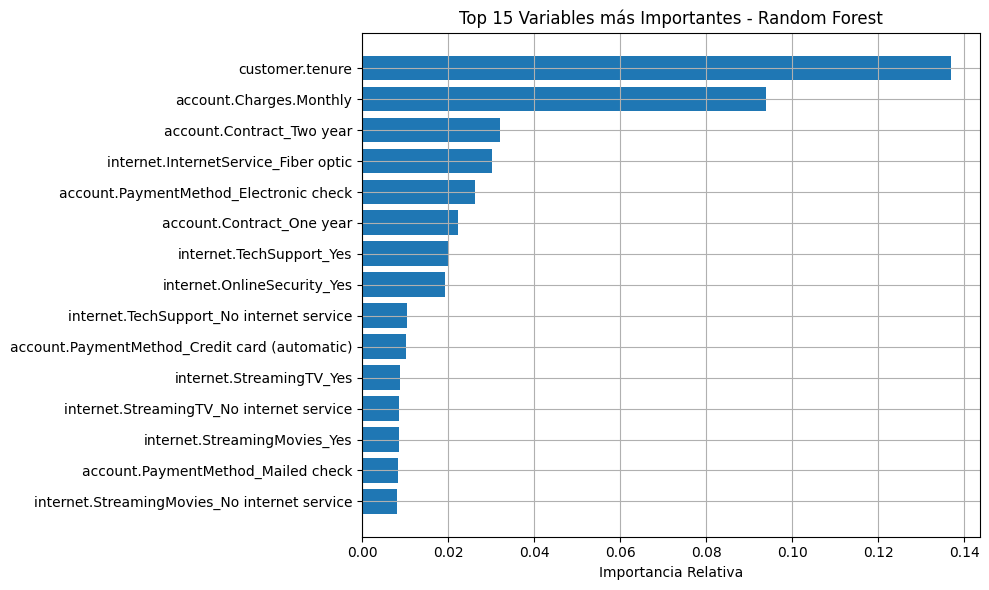

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Importancia de variables
rf_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Top 15
top_rf = rf_df.head(15)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(top_rf['Feature'][::-1], top_rf['Importance'][::-1])
plt.title('Top 15 Variables más Importantes - Random Forest')
plt.xlabel('Importancia Relativa')
plt.grid(True)
plt.tight_layout()
plt.show()


##Conlusion

#  Informe de Cancelación de Clientes – Análisis Predictivo

## 1.  Objetivo del análisis
Identificar los principales factores que explican la cancelación de clientes (`Churn`) en el banco, utilizando modelos de regresión logística y Random Forest, y proponer estrategias de retención basadas en los resultados.

---

## 2.  Modelos utilizados

| Modelo                | Métrica principal         | Interpretabilidad | Robustez ante no linealidad |
|----------------------|---------------------------|-------------------|-----------------------------|
| Regresión Logística  | Coeficientes (Odds Ratio) | Alta              | Baja                        |
| Random Forest        | Importancia de variables  | Media             | Alta                        |

Ambos modelos coinciden en los factores clave, pero Random Forest captura mejor interacciones no lineales y relaciones complejas.

---

## 3.  Principales factores que influyen en la cancelación

### Variables más influyentes (según ambos modelos)

| Variable                          | Interpretación                                                                 |
|-----------------------------------|--------------------------------------------------------------------------------|
| `customer.tenure`                | Clientes con menor tiempo de permanencia tienen mayor probabilidad de cancelar. |
| `account.Charges.Monthly`        | Gasto mensual elevado se asocia con mayor churn, especialmente sin beneficios. |
| `account.Contract_Two year`      | Contratos largos reducen significativamente la cancelación.                    |
| `internet.Service_Fiber optic`   | Clientes con fibra óptica presentan mayor churn (posible insatisfacción o costo). |
| `internet.OnlineSecurity_Yes`    | Servicios de seguridad reducen la probabilidad de cancelación.                |
| `account.PaymentMethod_Electronic check` | Este método se asocia con mayor churn. Puede reflejar menor fidelización. |

---

## 4.  Análisis complementario

- `account.Charges.Total` no aporta valor predictivo adicional, ya que está altamente correlacionado con `customer.tenure`.
- Clientes con contratos mensuales y sin servicios adicionales son los más propensos a cancelar.
- Métodos de pago automáticos (como tarjeta de crédito) se asocian con menor churn.

---

## 5.  Estrategias de retención recomendadas

###  Fidelización contractual
- Incentivar la migración a contratos de 1 o 2 años mediante descuentos o beneficios exclusivos.
- Ofrecer pruebas gratuitas de servicios adicionales (seguridad, soporte técnico) al inicio del contrato.

###  Optimización del gasto mensual
- Identificar clientes con alto gasto mensual y bajo uso de servicios → ofrecer paquetes personalizados.
- Implementar alertas de consumo y recomendaciones para optimizar el uso.

###  Intervención temprana
- Crear un sistema de alerta para clientes con baja permanencia (<12 meses) y alto gasto → contacto proactivo.
- Ofrecer encuestas de satisfacción y resolución rápida de problemas en los primeros meses.

###  Incentivar métodos de pago automáticos
- Promociones para clientes que adopten pagos automáticos (descuentos, puntos de fidelidad).

---

## 6.  Recomendaciones para próximos pasos

- Realizar segmentación de clientes por perfil de riesgo de churn.
- Implementar modelos de scoring para priorizar intervenciones.
- Medir el impacto de las estrategias de retención con A/B testing.

---
